# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Muhamad Syafe'ie
- Email: zhavei.vei@gmail.com
- Id Dicoding: zhavei

## Menentukan Pertanyaan Bisnis

1. Apakah produk yang paling banyak di minati dan tidak di minati?
2. 10 kategori produk terlaris berdasarkan keuntungan?
3. performa seller berdasarkan state dan city?
4. dimanakah pesanan terbanyak berdasarkan kota?



# Mengimport semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Data Wrangling

### Gathering Data

In [10]:
customers = pd.read_csv('data/customers_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
payments = pd.read_csv('data/order_payments_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
products_eng = pd.read_csv('data/product_category_name_translation.csv')

csv_files = [
    'customers_dataset.csv',
    'orders_dataset.csv',
    'order_reviews_dataset.csv',
    'order_payments_dataset.csv',
    'order_items_dataset.csv',
    'products_dataset.csv',
    'sellers_dataset.csv',
    'geolocation_dataset.csv',
    'product_category_name_translation.csv'
]

data = {'orders': orders,
        'items': order_items,
        'products': products,
        'payments': payments,
        'reviews': order_reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': products_eng}

# `csv_files` `data` di gunakan untuk proses gathering data, asenssing data dan cleaning data
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file}:")
    print(df.head())


customers_dataset.csv:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

orders_dataset.csv:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7

### Assessing Data

Sebelum melakukan analisis data, perlu dilakukan pemeriksaan data terlebih dahulu. Pemeriksaan data meliputi pengecekan tipe data, missing value, duplikat data, dan parameter statistik.

#### check info

In [14]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check info:")
    print(df.info())


customers_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

orders_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-nu

banyak data `date` bertipe object seharusnya ia merupakan data `date`

#### check null data

In [13]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check null:")
    print(df.isnull().sum())


customers_dataset.csv check null:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

orders_dataset.csv check null:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_reviews_dataset.csv check null:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

order_payments_dataset.csv check null:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0


#### check duplikasi data

In [22]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check duplikat:")
    print(f"jumlah duplikasi {file} : ", df.duplicated().sum())
    print(df.describe())


customers_dataset.csv check duplikat:
jumlah duplikasi customers_dataset.csv :  0
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

orders_dataset.csv check duplikat:
jumlah duplikasi orders_dataset.csv :  0
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8    

### Cleaning Data

membersihkan data customer, order_item, orders, dan products.

In [24]:
#data cleaning
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype('str')
order_items['order_item_id'] = order_items['order_item_id'].astype('str')

customers['customer_id'] = customers['customer_id'].astype(str)
order_items['order_id'] = order_items['order_id'].astype(str)
orders['order_id'] = orders['order_id'].astype(str)
products['product_id'] = products['product_id'].astype(str)

#fill order item dengan nilai default 0
order_items = order_items.fillna(0)

# Print info for each dataframe
print('Customers dataframe info:')
print(customers.info())

print('Orders dataframe info:')
print(orders.info())

print('Order items dataframe info:')
print(order_items.info())

print('Products dataframe info:')
print(products.info())



Customers dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None
Orders dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 no

                             product_id  total_qty
21617  aca2eb7d00ea1a7b8ebd4e68314663af        520
8429   422879e10f46682990de24d770e7f83d        484
19290  99a4788cb24856965c36a24e339b6058        477
                             product_id  total_qty
13773  6d12af216c3a452ad40ca5ccb6f15929          1
13771  6d0d465294cd2cb44aea084f34405967          1
32215  fffe9eeff12fcbd74a2f2b007dde0c58          1


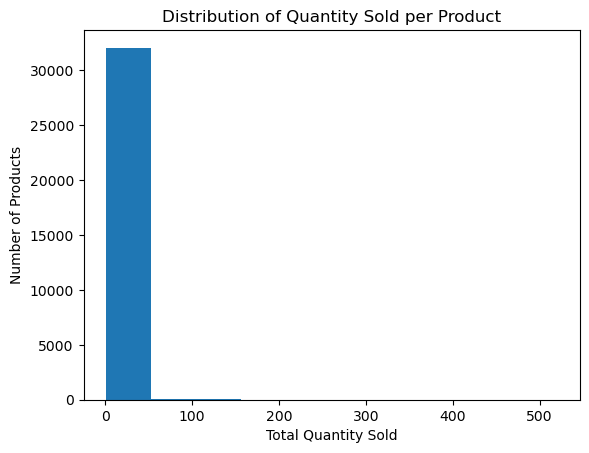

In [26]:
# test doang

# Keep only completed orders
orders = orders[orders['order_status'] == 'delivered']

# Join order items with orders
data = order_items.merge(orders[['order_id']], on='order_id')

# Group by product and sum quantity
product_qty = data.groupby('product_id')['order_item_id'].count().reset_index(name='total_qty')

# Sort products by total quantity sold
product_qty = product_qty.sort_values('total_qty', ascending=False)

# Top 3 most popular products 
print(product_qty.head(3)) 

# Bottom 3 least popular products
print(product_qty.tail(3))

# Plot distribution of product quantities
plt.hist(product_qty['total_qty'])
plt.xlabel('Total Quantity Sold')
plt.ylabel('Number of Products')
plt.title('Distribution of Quantity Sold per Product')
plt.show()

ax = top_cats.plot.barh(x='product_category_name', y='price', figsize=(12, 8), title='Top 5 Product Categories by Revenue')
ax.set_xlabel('Revenue ($)')


## Exploratory Data Analysis (EDA)

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

1. apakah produk yang paling banyak di minati dan tidak di minati?

### Pertanyaan 2: 

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2